# Machine learning. The importance of good features.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, accuracy_score, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.grid_search import GridSearchCV
from sklearn import cross_validation, tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import KFold,cross_val_score
from sklearn.cross_validation import train_test_split

Loading data.

In [6]:
data = pd.read_csv('wine2.csv', sep = ';', names = ['class','Alcohol','Alcohol_2', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','Chemical','OD280/OD315 of diluted wines','Proline'], index_col=False )
data.head()

,class,Alcohol,Alcohol_2,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,Chemical,OD280/OD315 of diluted wines,Proline
0,1,14.23,101.25,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,NaN,3.92,1065
1,1,13.20,87.12,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,NaN,3.40,1050
2,1,13.16,86.59,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,NaN,3.17,1185
3,1,14.37,103.25,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,NaN,3.45,1480
4,1,13.24,87.65,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,1.0,2.93,735


Show a description for each feature.

In [7]:
data.describe()

C:\Users\James\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,class,Alcohol,Alcohol_2,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,Chemical,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,14.000000,178.000000,178.000000
mean,1.938202,13.000618,84.835674,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.642857,2.611685,746.893258
std,0.775035,0.811827,10.543601,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,1.336306,0.709990,314.907474
min,1.000000,11.030000,60.830000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.000000,1.270000,278.000000
25%,1.000000,12.362500,76.412500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,NaN,1.937500,500.500000
50%,2.000000,13.050000,85.150000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,NaN,2.780000,673.500000
75%,3.000000,13.677500,93.535000,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,NaN,3.170000,985.000000
max,3.000000,14.830000,109.960000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,5.000000,4.000000,1680.000000


We can see, that feature "chemical" has only 14 values out of 178. So we can remove this feature because of many omissions.

In [8]:
data = data.drop('Chemical', 1)

Show the correlative matrix of features.

In [10]:
data.corr()

,class,Alcohol,Alcohol_2,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
class,1.000000,-0.328222,-0.336686,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.999449,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Alcohol_2,-0.336686,0.999449,1.000000,0.089014,0.213461,-0.314541,0.270473,0.300180,0.247352,-0.158644,0.147955,0.542558,-0.062418,0.082162,0.648038
Malic acid,0.437776,0.094397,0.089014,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.213461,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity of ash,0.517859,-0.310235,-0.314541,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,0.270473,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total phenols,-0.719163,0.289101,0.300180,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,0.247352,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid phenols,0.489109,-0.155929,-0.158644,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385


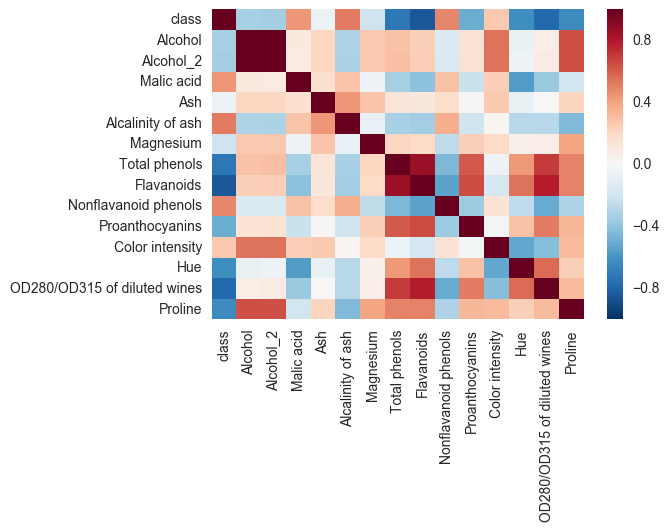

In [11]:
import seaborn as sns
%matplotlib inline
corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns.values,yticklabels=corr.columns.values)

We can see that features "alcohol" and "alcohol_2" are strongly correlate with each other. So we can remove one of them.

In [12]:
data = data.drop('Alcohol_2', 1)

We split the dataset into train and test datasets.

In [16]:
X = data.drop('class', 1)
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=50)

Run a random forest with cross validation

In [17]:
param_grid = {"criterion": ["gini", "entropy"], "max_features": [1, 3, 10], 
              "class_weight": [None, "balanced"], "n_estimators": [10, 20, 50], "max_depth": [10, 30, 50]}
rfc =  RandomForestClassifier(n_jobs=-1)
gs = GridSearchCV(rfc, param_grid=param_grid, cv=KFold(n=3), scoring='accuracy')
gs.fit(X_train, y_train)
pred = gs.predict(X_test)
print('Accuracy', accuracy_score(y_test, pred))

Accuracy 0.930555555556


Accuracy is good. Get best parameters

In [18]:
gs.best_params_

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 1,
 'n_estimators': 10}

In [19]:
rf = RandomForestClassifier(class_weight=None, criterion='gini',
            max_depth=10, max_features=1, n_estimators=10, n_jobs=-1)
rf.fit(X_train, y_train)
pred = rf.predict(X_test)

Random forest in Python has a function that shows importance of features (weights).

In [21]:
rf.feature_importances_

array([ 0.03782277,  0.03535451,  0.02493091,  0.06090972,  0.11126105,
        0.05534275,  0.0929515 ,  0.02865531,  0.13080809,  0.24861548,
        0.07782332,  0.06401571,  0.03150886])

Than we show the features which weights are less than 0,03.

In [22]:
a = []
for i in range(13):
    if rf.feature_importances_[i] < 0.03:
        a.append(i)
X_train.columns[a]

Index(['Ash', 'Nonflavanoid phenols'], dtype='object')

We remove these features to see how random forest will predict class.

In [23]:
X_train1 = X_train.copy()
X_test1 = X_test.copy()

X_train1 = X_train1.drop('Ash', axis=1)
X_train1 = X_train1.drop('Nonflavanoid phenols', axis=1)

X_test1 = X_test1.drop('Ash', axis=1)
X_test1 = X_test1.drop('Nonflavanoid phenols', axis=1)

In [24]:
rf = RandomForestClassifier(class_weight=None, criterion='gini',
            max_depth=10, max_features=1, n_estimators=10, n_jobs=-1)
rf.fit(X_train1, y_train)
pred = rf.predict(X_test1)
accuracy_score(y_test, pred)

0.97222222222222221

Accuracy grows up! Thats good.